# Human Activity Recognition

<br> The goal of this project is to create a model that can predict human actions like walking, walking upstairs, walking downstairs, sitting, standing, and lying down.

This dataset was gathered from 30 people (referred to as subjects in this dataset) who were doing various activities while carrying a smartphone around their waists. The data is collected using the smartphone's sensors (accelerometer and gyroscope). This experiment was videotaped so that the data could be manually labelled.</br>

## How data was recorded

They acquired '3-axial linear acceleration' (_tAcc-XYZ_) from the accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from the Gyroscope with many modifications utilising the sensors (Gyroscope and accelerometer) in a smartphone.
> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names


1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)

+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__

#### Dataset link:-https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

# Exploratory Data Analysis

In [1]:
%%time
import pandas as pd
import numpy as np
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Wall time: 4.29 s


In [2]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [4]:
print('Total number of train data points {} and features {}'.format(train.shape[0],train.shape[1]))

Total number of train data points 7352 and features 563


In [5]:
print('Total number of test data points {} and features {}'.format(test.shape[0],test.shape[1]))

Total number of test data points 2947 and features 563


# Data Cleaning

## 1. Check for Duplicates

In [6]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [7]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

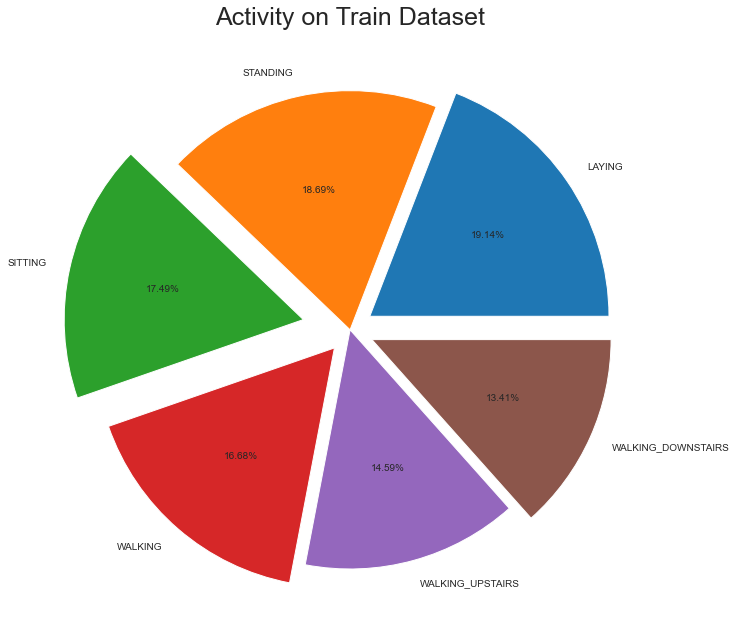

In [9]:
labels=train['Activity'].value_counts().index
sizes=train['Activity'].value_counts().values
plt.figure(figsize=(11,11))
explode = (0.1, 0.0, 0.2, 0.1, 0.0, 0.1)
plt.pie(sizes,labels=labels,autopct="%1.2f%%",explode=explode)
plt.title("Activity on Train Dataset",size=25)
plt.show()

In [12]:
import warnings
warnings.filterwarnings('ignore')
def perc_on_bar(data,x,title):
    total_len = len(data[x]) # length of the column
    plt.figure(figsize=(15,7))
    plt.title(title,fontsize=15)
    ax = sns.countplot(data[x],palette='Paired')
    for p in ax.patches:
        per = '{:.1f}%'.format(100 * p.get_height()/total_len) 
        x = p.get_x() + p.get_width() / 2 - 0.10
        y = p.get_y() + p.get_height()          
        ax.annotate(per, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

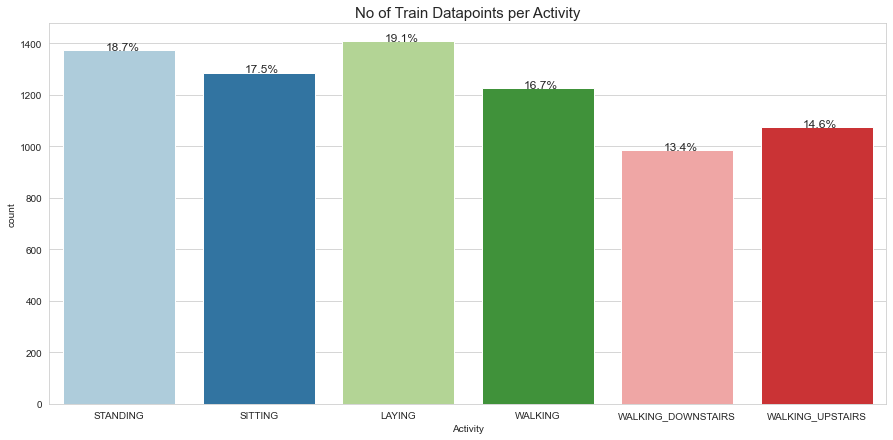

In [13]:
perc_on_bar(train,'Activity','No of Train Datapoints per Activity')

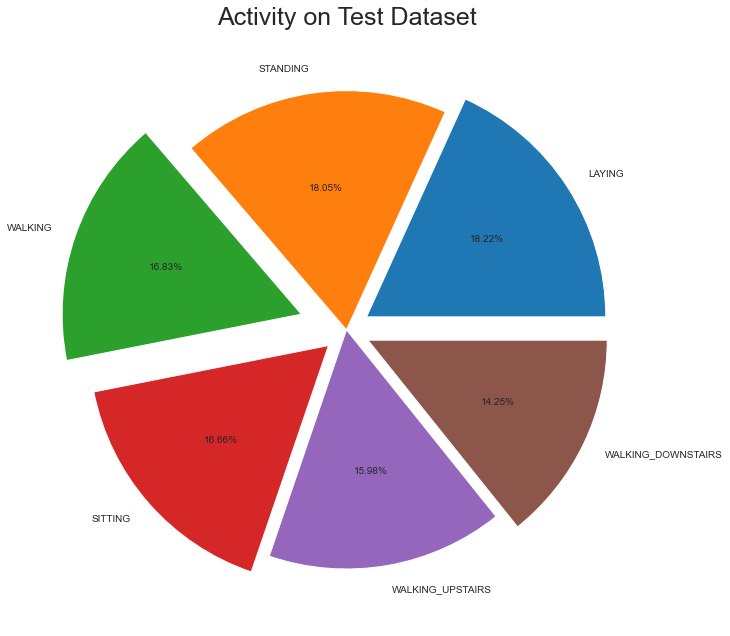

In [14]:
labels=test['Activity'].value_counts().index
sizes=test['Activity'].value_counts().values
plt.figure(figsize=(11,11))
explode = (0.1, 0.0, 0.2, 0.1, 0.0, 0.1)
plt.pie(sizes,labels=labels,autopct="%1.2f%%",explode=explode)
plt.title("Activity on Test Dataset",size=25)
plt.show()

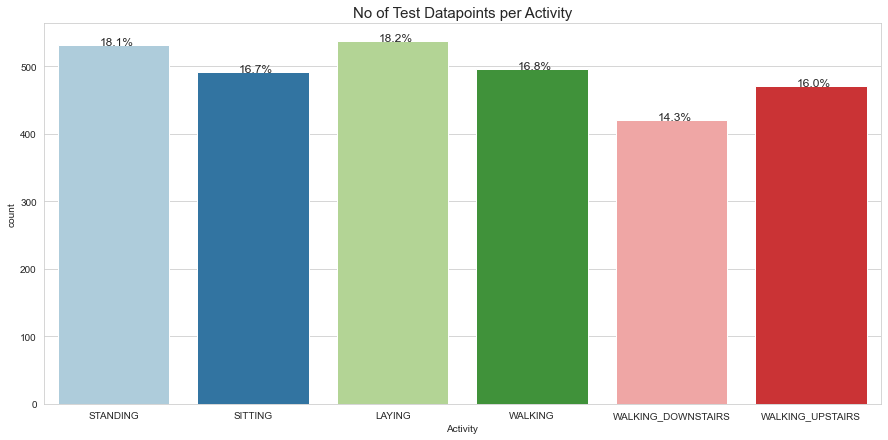

In [15]:
perc_on_bar(test,'Activity','No of Test Datapoints per Activity')

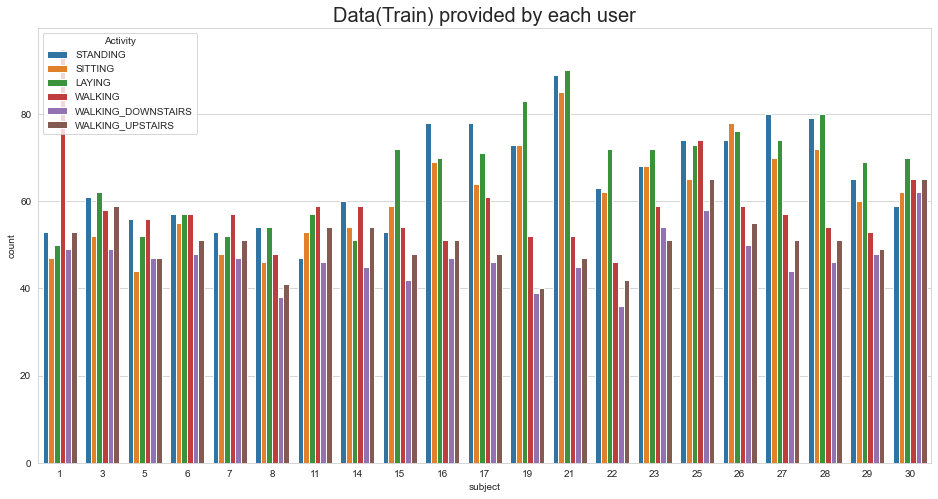

In [16]:
plt.figure(figsize=(16,8))
plt.title('Data(Train) provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.show()

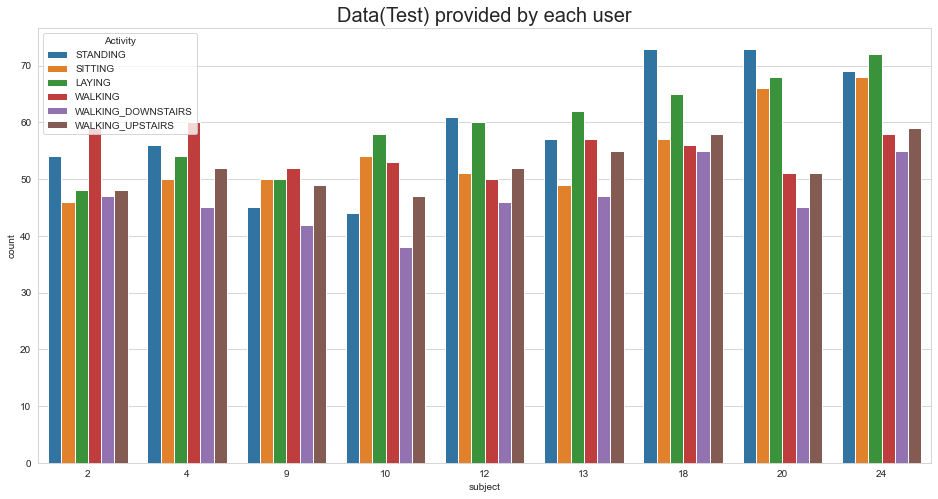

In [17]:
plt.figure(figsize=(16,8))
plt.title('Data(Test) provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = test)
plt.show()

## 4. Changing feature names 

In [18]:
import warnings
warnings.filterwarnings('ignore')
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [19]:
mapActivity={'STANDING':4,'SITTING':3,'LAYING':5,'WALKING':0,'WALKING_DOWNSTAIRS':2,'WALKING_UPSTAIRS':1}
train['Target']=train['Activity'].map(mapActivity)
test['Target']=test['Activity'].map(mapActivity)

+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

### Stationary and Moving activities are completely different

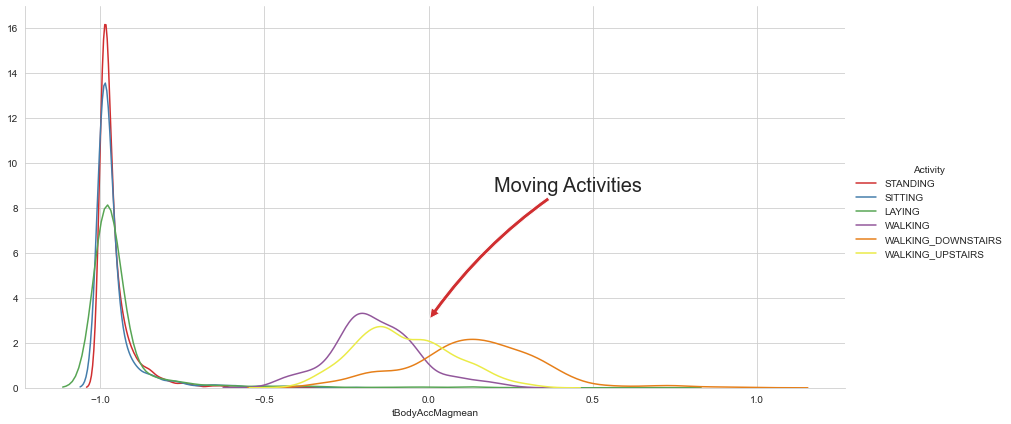

In [20]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(3,0), xytext=(0.2,9), size=20,va='center', ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,va='center', ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

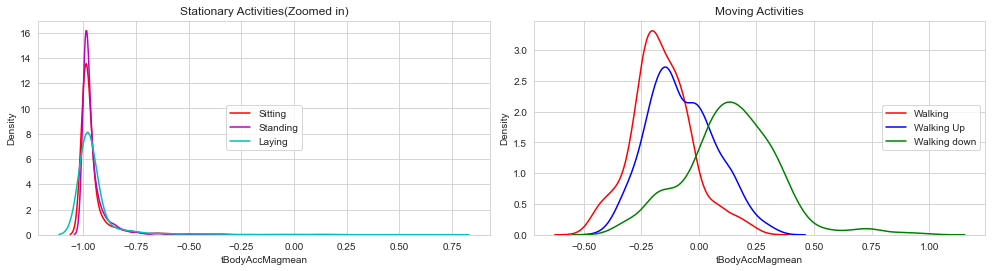

In [21]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df0 = train[train['Target']==0]
df1 = train[train['Target']==1]
df2 = train[train['Target']==2]
df3 = train[train['Target']==3]
df4 = train[train['Target']==4]
df5 = train[train['Target']==5]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df3['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df4['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df5['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df0['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df1['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df2['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

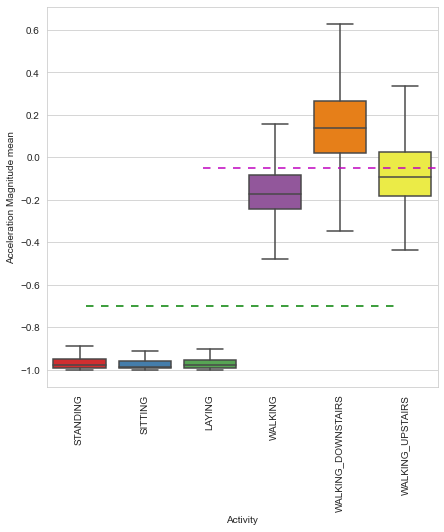

In [22]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

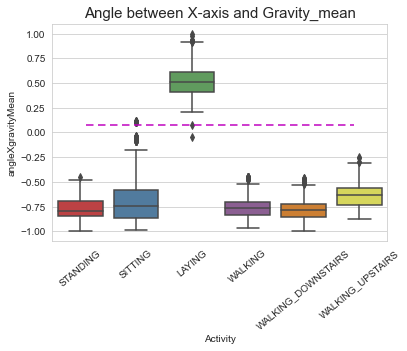

In [23]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

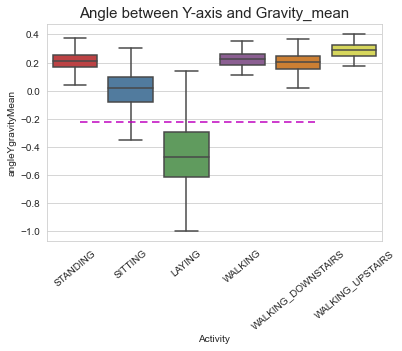

In [24]:
sns.boxplot(x='Activity', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

### Apply TSNE on Data

In [25]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
def perform_TSNE(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.018s...
[t-SNE] Computed neighbors for 7352 samples in 6.888s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.153s
[t-SNE] Iteration 50: error = 124.7099686, gradient norm = 0.0247748 (50 iterations in 5.686s)
[t-SNE] Iteration 100: error = 107.1778488, gradient norm = 0.0322015 (50 iterations in 

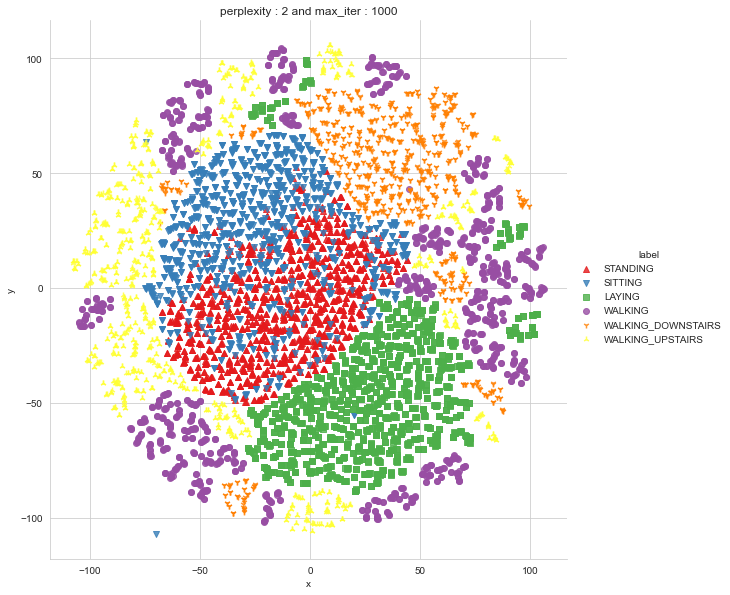

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.019s...
[t-SNE] Computed neighbors for 7352 samples in 6.711s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.202s
[t-SNE] Iteration 50: error = 113.8749619, gradient norm = 0.0243348 (50 iterations in 10.481s)
[t-SNE] Iteration 100: error = 97.2110901, gradient norm = 0.0152193 (50 iteratio

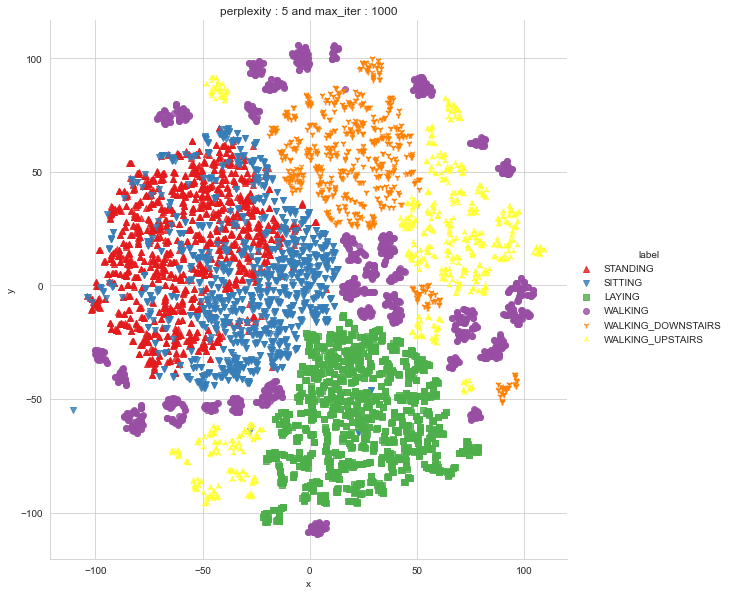

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.019s...
[t-SNE] Computed neighbors for 7352 samples in 7.438s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.468s
[t-SNE] Iteration 50: error = 105.2072754, gradient norm = 0.0253152 (50 iterations in 8.046s)
[t-SNE] Iteration 100: error = 90.2989807, gradient norm = 0.0099520 (50 iteratio

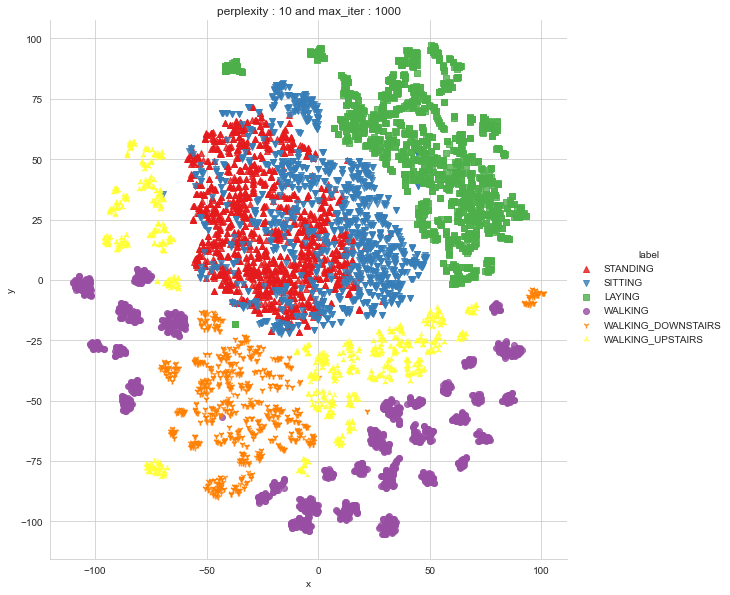

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.020s...
[t-SNE] Computed neighbors for 7352 samples in 6.505s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.781s
[t-SNE] Iteration 50: error = 97.6392822, gradient norm = 0.0170561 (50 iterations in 6.363s)
[t-SNE] Iteration 100: error = 83.8712616, gradient norm = 0.0062082 (50 iteration

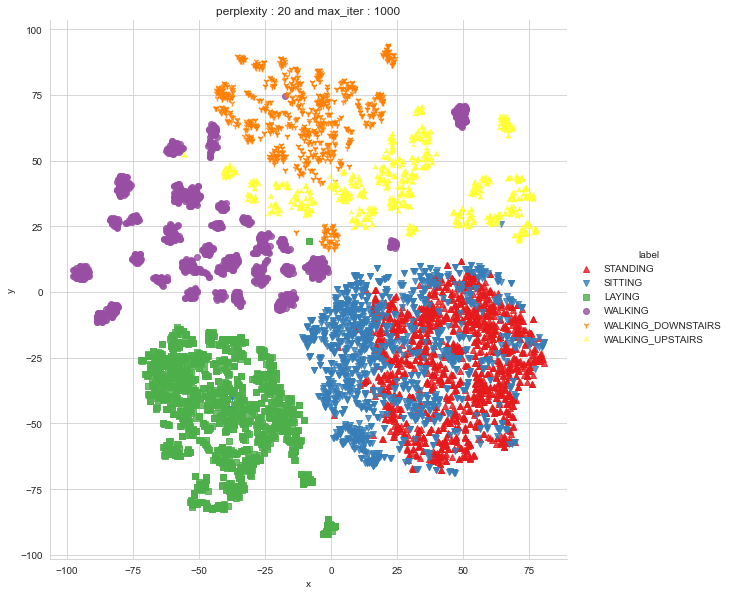

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.019s...
[t-SNE] Computed neighbors for 7352 samples in 7.371s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 1.866s
[t-SNE] Iteration 50: error = 85.2550278, gradient norm = 0.0321566 (50 iterations in 11.254s)
[t-SNE] Iteration 100: error = 75.9478226, gradient norm = 0.0045339 (50 iterati

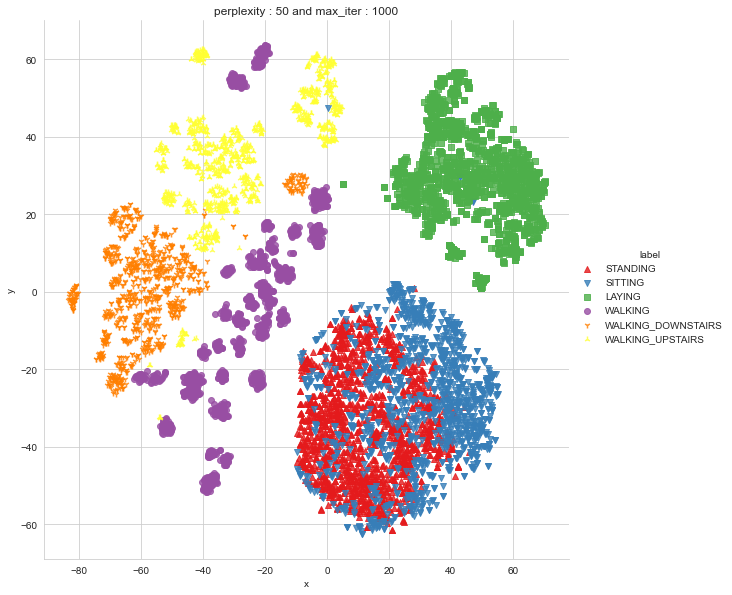

Done
Wall time: 9min


In [27]:
%%time
X_pre_tsne = train.drop(['subject', 'Activity','Target'], axis=1)
y_pre_tsne = train['Activity']
perform_TSNE(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities=[2,5,10,20,50])

### Apply PCA on Data

In [28]:
from sklearn.decomposition import PCA

def perform_PCA(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        pca = PCA(n_components=3)
        X_reduced = pca.fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 50 and with 1000 iterations at max
Done..
Creating plot for this t-sne visualization..
saving this plot as image in present working directory...


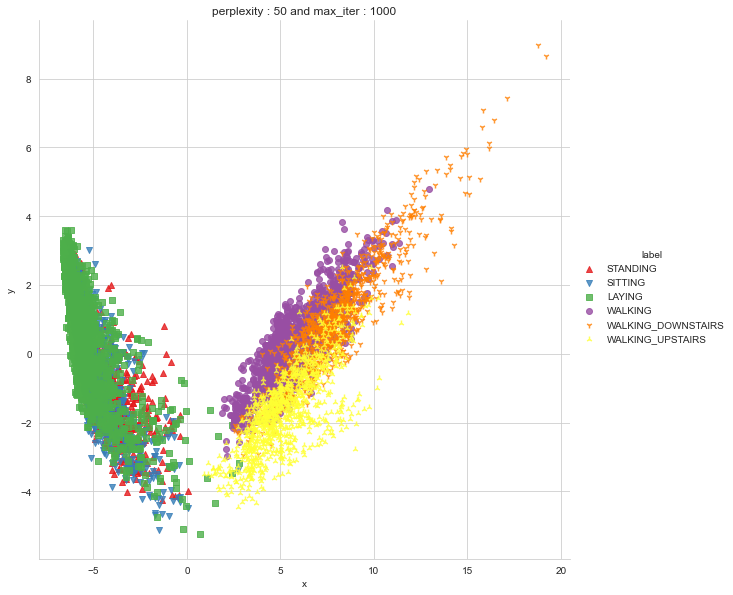

Done

performing tsne with perplexity 100 and with 1000 iterations at max
Done..
Creating plot for this t-sne visualization..
saving this plot as image in present working directory...


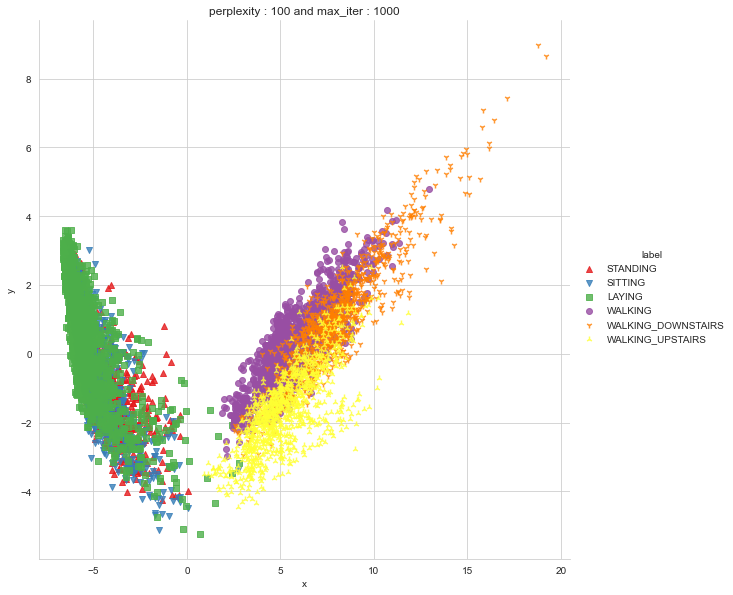

Done

performing tsne with perplexity 500 and with 1000 iterations at max
Done..
Creating plot for this t-sne visualization..
saving this plot as image in present working directory...


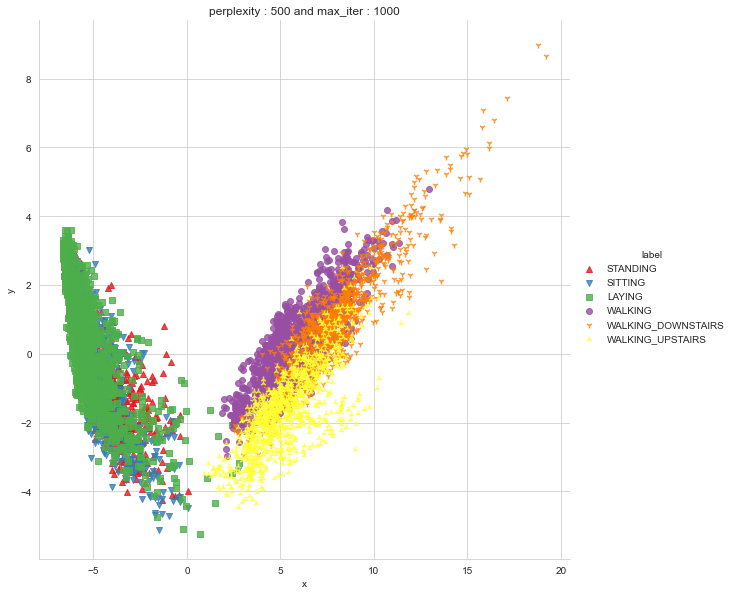

Done

performing tsne with perplexity 1000 and with 1000 iterations at max
Done..
Creating plot for this t-sne visualization..
saving this plot as image in present working directory...


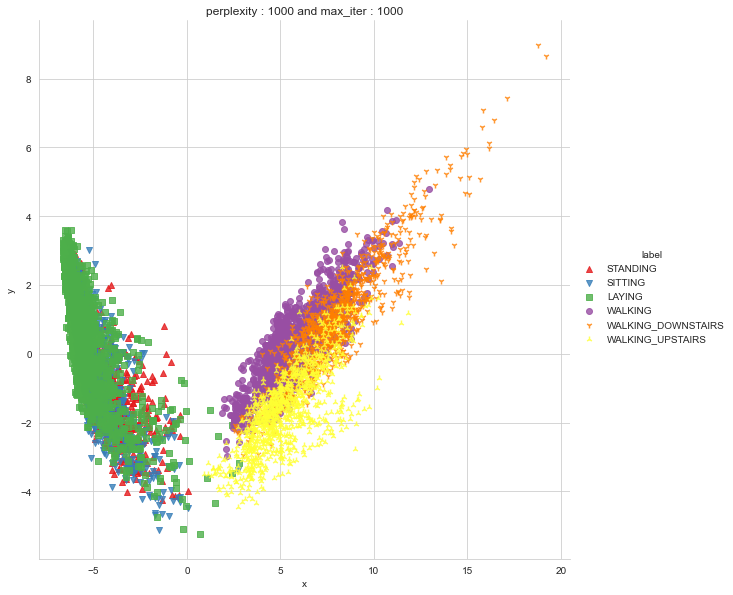

Done

performing tsne with perplexity 5000 and with 1000 iterations at max
Done..
Creating plot for this t-sne visualization..
saving this plot as image in present working directory...


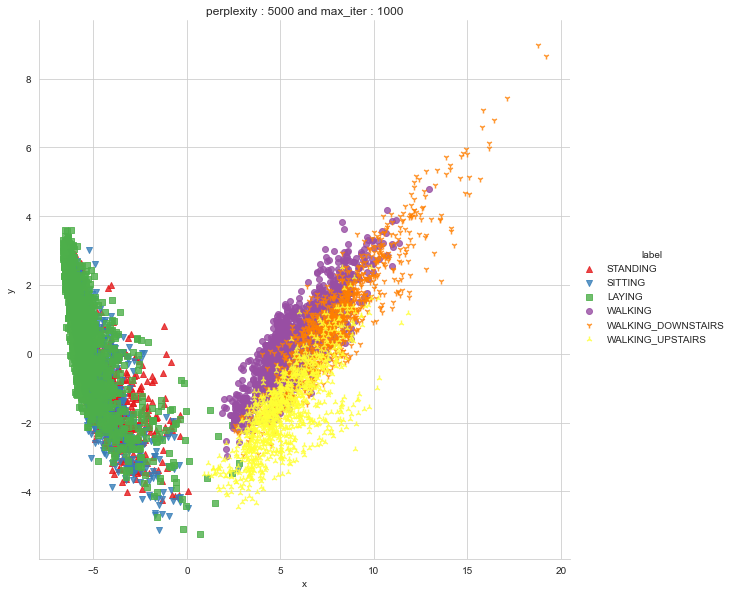

Done
Wall time: 16.8 s


In [29]:
%%time
X_pre_tsne = train.drop(['subject', 'Activity','Target'], axis=1)
y_pre_tsne = train['Activity']
perform_PCA(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities=[50,100,500,1000,5000])